This script is the main script of the project. It trains a deep neural network on the MNIST dataset using a greedy layer-wise unsupervised pretraining strategy and compared to a baselinemodel trained without unsupervised pretraining. 
This script is split into two cells:
1. the training of the models
2. the visualisation of the models compared.

In [ ]:
'''
This cell is divided into four steps:
1. Data loading: the MNIST dataset is loaded using the get_mnist_loaders function from the data_loader module.
2. Baseline training: a deep neural network is trained on the MNIST dataset without unsupervised pretraining.
3. Unsupervised pretraining: a deep neural network is trained on the MNIST dataset using a greedy layer-wise unsupervised pretraining strategy.
4. Supervised fine-tuning: the pretrained deep neural network is fine-tuned on the MNIST dataset using supervised learning.
#This cell might take a while, if executed.'''

# Import necessary modules
from data_loader import get_mnist_loaders
from training import greedy_layerwise_pretraining, supervised_training, train_baseline_model
from time import time
from visualization import (convert_seconds_to_mmss, plot_loss_curves, plot_confusion_matrices, plot_training_time, 
                           visualize_weights_evolution, generate_comparison_table)

# Load data
print("Step 1: Data loading")
start_time = time()
train_loader, test_loader = get_mnist_loaders()
step_1_time = time()

elapsed_time = step_1_time - start_time
formatted_time = convert_seconds_to_mmss(elapsed_time)

print("End Step 1: Data loading time = {} minutes".format(formatted_time))

# Train baseline model
print("Step 2: Baseline training")
baseline_accuracy, baseline_losses, baseline_times, baseline_weights, baseline_preds, true_labels = train_baseline_model(train_loader, test_loader)
step_2_time = time()
elapsed_time = step_2_time - step_1_time
formatted_time = convert_seconds_to_mmss(elapsed_time)
print("End Step 2: Baseline training time = {} minutes".format(formatted_time))

# Greedy layer-wise unsupervised pretraining
print("Step 3: Unsupervised pretraining")
pretrained_model, pretrained_losses, pretrained_times, pretrained_weights, pretrained_preds = greedy_layerwise_pretraining(train_loader,test_loader)
step_3_time = time()
elapsed_time = step_3_time - step_2_time
formatted_time = convert_seconds_to_mmss(elapsed_time)
print("End Step 3: Unsupervised pretraining time = {} minutes".format(formatted_time))

# Supervised fine-tuning
print("Step 4: Supervised fine-tuning")
final_model, final_accuracy, final_losses, final_times, final_weights, final_preds, _ = \
supervised_training(pretrained_model, train_loader, test_loader)
step_4_time = time()
elapsed_time = step_4_time - step_3_time
formatted_time = convert_seconds_to_mmss(elapsed_time)
print("End Step 4: Supervised fine-tuning time = {} minutes".format(formatted_time))


Step 1: Data loading
End Step 1: Data loading time = 00:00:042 minutes
Step 2: Baseline training


 Baseline training: Epoch 6/5, Loss: 0.2467: 100%|██████████| 938/938 [00:15<00:00, 60.83it/s]


 Evaluating the model on the test set...


 Evaluating: 100%|██████████| 10/10 [00:01<00:00,  5.16it/s]


 Baseline model accuracy: 9525/10000 (95.25%)
End Step 2: Baseline training time = 01:22:559 minutes
Step 3: Unsupervised pretraining
 Training Autoencoder 1 (28*28 -> 128)


  Autoencoder 1 training: Epoch 5/5, Loss: 0.3582: 100%|██████████| 938/938 [00:15<00:00, 59.11it/s]


 Training Autoencoder 2 (128 -> 64)


  Autoencoder 2 training: Epoch 5/5, Loss: 0.1027: 100%|██████████| 157/157 [00:00<00:00, 292.90it/s]


End Step 3: Unsupervised pretraining time = 01:25:943 minutes
Step 4: Supervised fine-tuning


 Evaluating: 9539/10000 correct: 100%|██████████| 10/10 [00:02<00:00,  4.99it/s]

 Test set: Accuracy: 9539/10000 (95.39%)
End Step 4: Supervised fine-tuning time = 01:19:869 minutes


In [2]:
print(epoch_counter)

[1, 2, 3, 4, 5]


| Metric                 | Baseline Model                                                        | Supervised Model                                                       | Difference (Δ)                                                                                                                                                                 |
|:-----------------------|:----------------------------------------------------------------------|:-----------------------------------------------------------------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Overall Accuracy (%)   | 9525.0                                                                | 9539.0                                                                 | 14.0                                                                                                                              

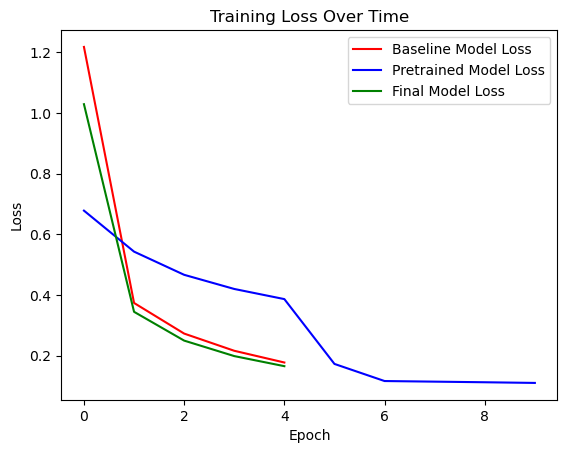

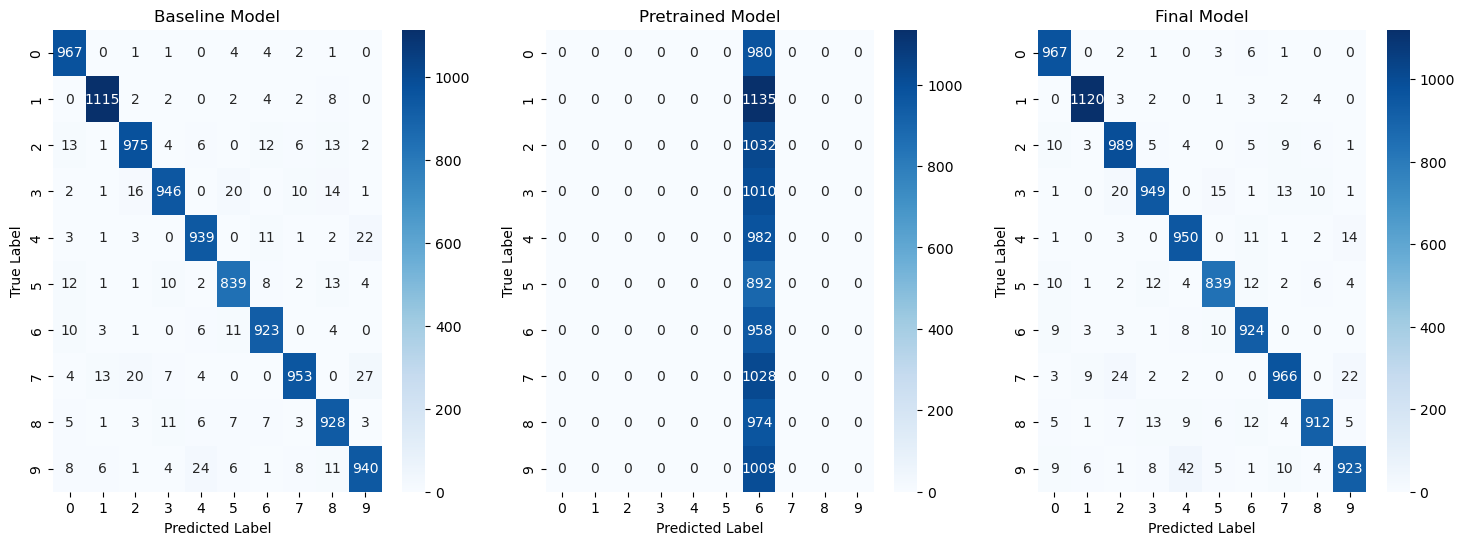

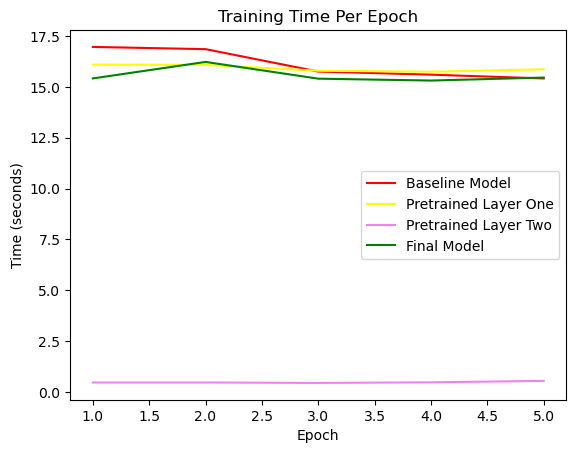

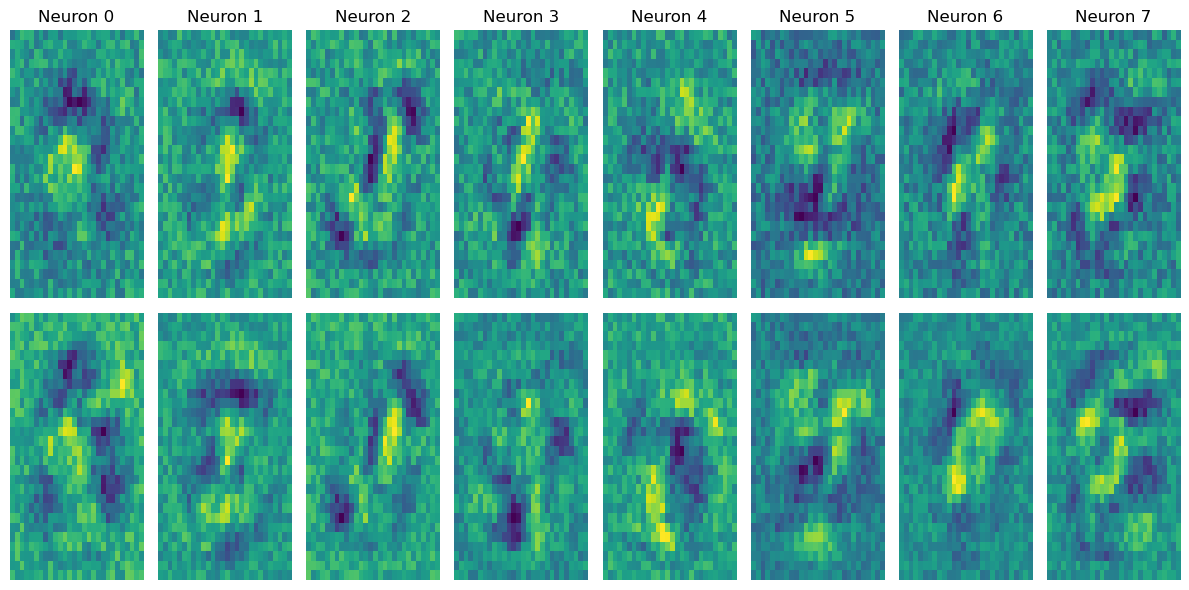

Total execution time = 248.42 seconds


In [3]:
"""
This cell is for the visualisation of the results. The following visualisations are generated:
1. Overview table: an overview table is generated that compares the performance of the baseline model and the final model.
...
"""

# Visualize the results in an overview table
df = generate_comparison_table(baseline_accuracy=baseline_accuracy, final_accuracy=final_accuracy, baseline_preds=baseline_preds, final_preds=final_preds, 
    true_labels=true_labels, baseline_losses=baseline_losses, final_losses=final_losses, baseline_training_time=step_2_time - step_1_time, 
    supervised_training_time=step_4_time - step_2_time)

plot_loss_curves(baseline_losses, pretrained_losses, final_losses) #layer 2 loss must be stand-alone
plot_confusion_matrices(true_labels, baseline_preds, pretrained_preds, final_preds)
plot_training_time(baseline_times, pretrained_times, final_times)
visualize_weights_evolution(final_weights, epochs=[0, len(final_weights) - 1], layer_index='layer1.weight')

# Total time
print("Total execution time = {:.2f} seconds".format(step_4_time - start_time))